https://networkx.org/documentation/latest/tutorial.html

# 노드, 엣지 생성 및 삭제

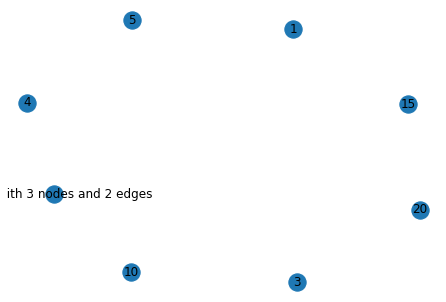

In [45]:
import networkx as nx
G = nx.Graph()

G.add_node(1)
G.add_nodes_from([2, 3])

#You can also add nodes along with node attributes if your container yields 2-tuples of the form (node,node_attribute_dict):
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

# Nodes from one graph can be incorporated into another:
H = nx.path_graph([10,15,20])
G.add_nodes_from(H)


# 노드 1개에 3개의 노드 때려박기
H1 = nx.path_graph([10,15,20])
G.add_node(H1) 


G.remove_node(2) # 노드제거

nx.draw(G, with_labels = True)

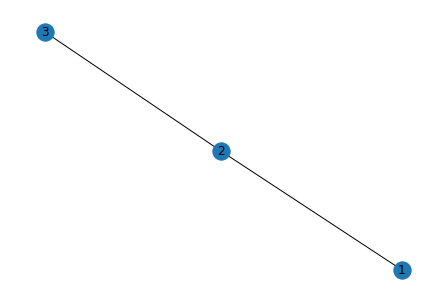

In [86]:
G.add_edge(1, 2)

# 튜플 생성 후 연결도 가능 
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

# 튜플 로 한변에 여러개 엣지 생성 (효율적)
G.add_edges_from([(1, 2), (1, 3)])

# 엣지 제거
G.remove_edge(1, 3)

nx.draw(G, with_labels = True)

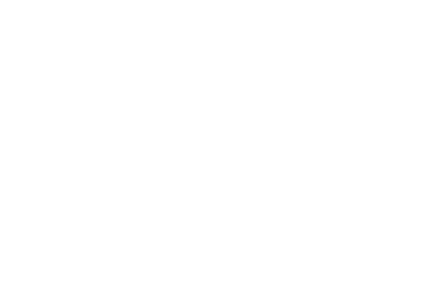

In [99]:
G.clear() # 그래프 제거
nx.draw(G, with_labels = True)

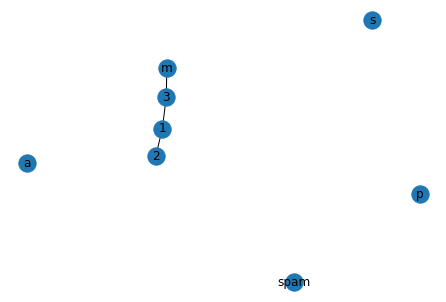

In [88]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')
nx.draw(G, with_labels = True)
# G.clear()            # 그래프 제거

## 리스트와 딕셔너리 활용, 그래프 생성 가능

[(0, 1), (1, 2), (2, 3)]


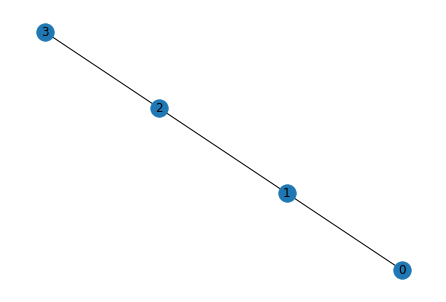

In [105]:
edgelist = [[0, 1], [1, 2], [2, 3]]
H = nx.Graph(edgelist)  
print(list(H.edges()))
nx.draw(H, with_labels = True)
# G.clear()            # 그래프 제거

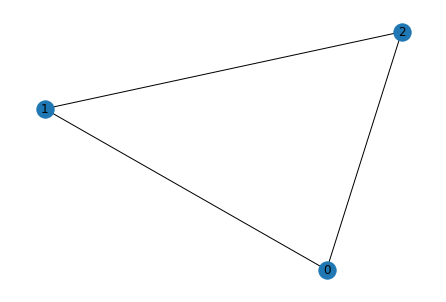

In [106]:
adjacency_dict = {0: [1, 2], 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs
list(H.edges())
nx.draw(H, with_labels = True)

In [151]:
# nx.draw(G, with_labels = True)
G.clear()
# H.clear()

## 두 노드 사이의 상관계수 활용하여 그래프 생성

엣지와 weight를 이중리스트 형태로 입력하여 그래프 생성 가능 

In [120]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [140]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
# for n, nbrs in FG.adj.items():
#     # print(n, nbrs)
#     for nbr, eattr in nbrs.items():
#         print(nbr, eattr)

In [141]:
FG.adj.items()

ItemsView(AdjacencyView({1: {2: {'weight': 0.125}, 3: {'weight': 0.75}}, 2: {1: {'weight': 0.125}, 4: {'weight': 1.2}}, 3: {1: {'weight': 0.75}, 4: {'weight': 0.375}}, 4: {2: {'weight': 1.2}, 3: {'weight': 0.375}}}))

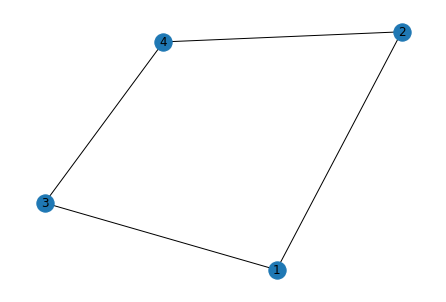

In [142]:
nx.draw(FG, with_labels = True) 
# 1-3,2-4 가깝고, 1-2 멀게 등...확인, but 매번 그래프 모양은 바뀜

In [143]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


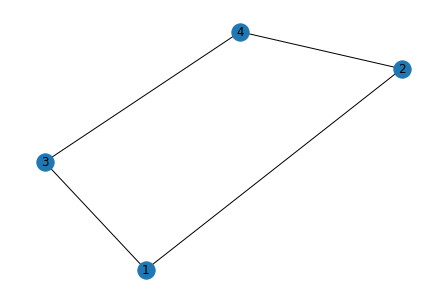

In [144]:
nx.draw(FG, with_labels = True) 

# 그래프 요소 점검하기

In [65]:
G.number_of_nodes(),G.number_of_edges()

(8, 3)

In [70]:
# 노드 및 엣지 리스트 확인
list(G.nodes),list(G.edges)

([1, 2, 3, 'spam', 's', 'p', 'a', 'm'], [(1, 2), (1, 3), (3, 'm')])

In [71]:
# 인접한 노드 확인
list(G.adj[1])

[2, 3]

In [77]:
# 발생한 엣지의 수 확인
G.degree[1] ,G.degree([2, 'm'])

(2, DegreeView({2: 1, 'm': 1}))

In [76]:
# 관련된 모든 엣지를 보여줌
G.edges([2, 3])

EdgeDataView([(2, 1), (3, 1), (3, 'm')])

## 노드 속성 Node attributes

노드는 딕셔너리 형태로 속성값을 내포할 수 있다

In [145]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [147]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

In [148]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [149]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

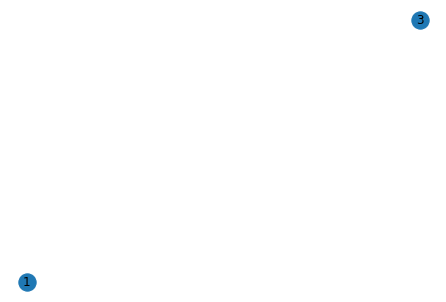

In [150]:
nx.draw(G, with_labels = True) 
# 정보를 내포하고 있는 1, 3 노드가 보인다

## 엣지 속성 Edge Attributes

엣지는 가중치를 속성으로 갖는다

In [153]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

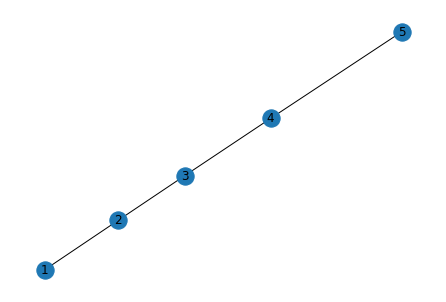

In [154]:
nx.draw(G, with_labels = True) 

In [152]:
# nx.draw(G, with_labels = True)
G.clear()
# H.clear()

# 그래프 기호 활용하기

## 화살표

양방향

[(1, 2), (2, 1)]


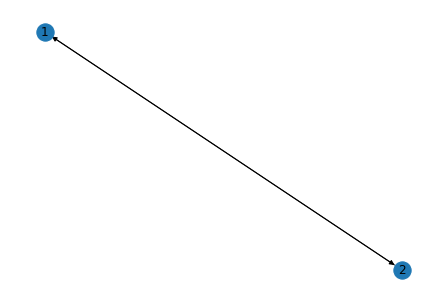

In [98]:
# 상호 화살표
G.add_edge(1, 2)
H = nx.DiGraph(G) 
print(list(H.edges()))
nx.draw(H, with_labels = True)
# G.clear()            # 그래프 제거

일방향

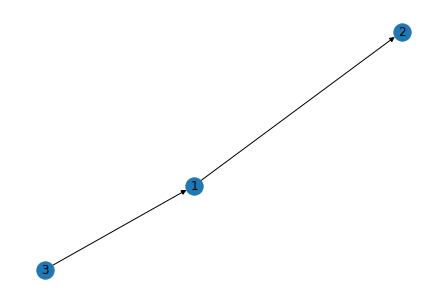

In [155]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')
nx.draw(DG, with_labels = True)

In [160]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
print(dict(MG.degree(weight='weight')))

{1: 1.25, 2: 1.75, 3: 0.5}


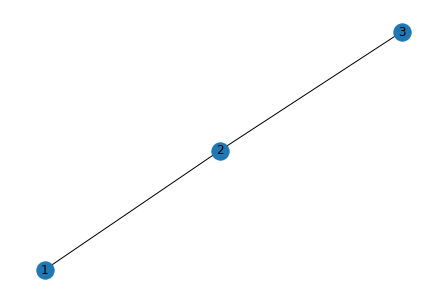

In [159]:
# 가중치 통일
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)
nx.draw(GG, with_labels = True)